In [46]:
from pydrake.planning import GcsTrajectoryOptimization
import numpy as np
from pydrake.geometry.optimization import (
    GraphOfConvexSetsOptions,
    GraphOfConvexSets,
    HPolyhedron,
    Point,
    VPolytope,
    
)

import matplotlib.pyplot as plt

class Drone:
    def __init__(self, start_point, end_point, shapes):
        self.start_point = start_point
        self.end_point = end_point
        gcs = GcsTrajectoryOptimization(2) # 2 d setup
        main1 = gcs.AddRegions(regions=[HPolyhedron(VPolytope(v)) for v in shapes], order=3, name="main1")
        gcs.AddPathLengthCost(weight=1.0)
        start_region = gcs.AddRegions([Point(start_point)], 0)
        # middle_region = gcs.AddRegions([Point(middle_pt)], 0)
        goal_region = gcs.AddRegions([Point(end_point)], 0)
        gcs.AddEdges(start_region, main1)
        gcs.AddEdges(main1, goal_region)
        options = GraphOfConvexSetsOptions()
        options.convex_relaxation = True
        options.max_rounded_paths = 10
        options.preprocessing = True
        self.gcs = gcs
        self.trajectory, self.sol = gcs.SolvePath(start_region, goal_region, options)
        # self.finish_traj, self.sol = gcs.SolvePath(middle_region, goal_region, options)
        self.last_known_location = start_point  # Initially set to None
    
    def generate_samples(self):
        samples = []
        t_max = self.trajectory.end_time()
        t = 0
        while t<t_max:
            samples.append(d.trajectory.value(t))
            t += 0.1
        return samples

In [66]:
vertices = [
    np.array([[0.4, 0.4, 0.0, 0.0], [0.0, 5.0, 5.0, 0.0]]),
    np.array([[0.4, 1.0, 1.0, 0.4], [2.0, 2.0, 3.6, 3.6]]),
    np.array([[1.4, 1.4, 1.0, 1.0], [2.2, 4.6, 4.6, 2.2]]),
    np.array([[1.4, 2.7, 2.7, 1.4], [2.2, 2.6, 2.8, 2.8]]),
    np.array([[2.4, 2.4, 3.4, 3.4], [2.2, 2.8, 2.8, 2.2]]),
    np.array([[2.2, 2.7, 2.7, 2.2], [2.8, 2.8, 4.6, 4.6]]),
    np.array([[1.4, 1.0, 1.0, 3.8, 3.8], [2.2, 2.2, 0.0, 0.0, 0.2]]),
    np.array([[3.8, 3.8, 1.0, 1.0], [4.6, 5.0, 5.0, 4.6]]),
    np.array([[5.0, 5.0, 4.8, 3.8, 3.8], [0.0, 1.2, 1.2, 0.2, 0.0]]),
    np.array([[3.4, 4.8, 5.0, 5.0], [2.6, 1.2, 1.2, 2.6]]),
    np.array([[3.4, 3.8, 3.8, 3.4], [2.6, 2.6, 4.6, 4.6]]),
    np.array([[3.8, 4.4, 4.4, 3.8], [2.8, 2.8, 3.0, 3.0]]),
    np.array([[5.0, 5.0, 4.4, 4.4], [2.8, 5.0, 5.0, 2.8]])]
start = np.array([0.2, 0.2])
int_way = np.array([2.0, 2.5])
goal = np.array([3.0, 2.5])

d = Drone(start, int_way, vertices)
d2 = Drone(int_way, goal, vertices)
d3 = Drone(start, np.array([3.3, 4.6]), vertices)
d4 = Drone(np.array([3.3, 4.6]), goal, vertices)
d5 = Drone(start, np.array([4.0, 0.2]), vertices)
d6 = Drone(np.array([4.0, 0.2]), goal, vertices)

INFO:drake:Solved GCS shortest path using Clarabel with convex_relaxation=true and preprocessing=true and rounding.
INFO:drake:Finished 100 rounding trials with Clarabel.
INFO:drake:Solved GCS shortest path using Clarabel with convex_relaxation=true and preprocessing=true and rounding.
INFO:drake:Finished 100 rounding trials with Clarabel.
INFO:drake:Solved GCS shortest path using Clarabel with convex_relaxation=true and preprocessing=true and rounding.
INFO:drake:Finished 39 rounding trials with Clarabel.
INFO:drake:Solved GCS shortest path using Clarabel with convex_relaxation=true and preprocessing=true and rounding.
INFO:drake:Finished 100 rounding trials with Clarabel.
INFO:drake:Solved GCS shortest path using Clarabel with convex_relaxation=true and preprocessing=true and rounding.
INFO:drake:Finished 100 rounding trials with Clarabel.
INFO:drake:Solved GCS shortest path using Clarabel with convex_relaxation=true and preprocessing=true and rounding.
INFO:drake:Finished 100 roundi

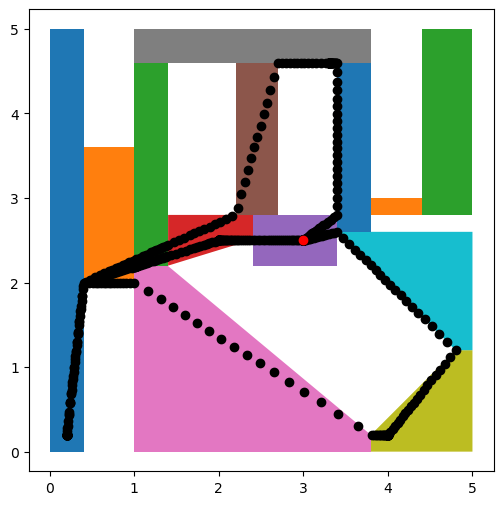

In [70]:
# d.generate_samples()
def visualise_solution(trajs, result, vertices, resolution = 100):
    plt.figure(figsize=(6, 6))
    plt.axis('equal')

    for polygon in vertices:
        plt.fill(polygon[0], polygon[1])
    for trajectory in trajs:
        for t in range(0, resolution):
            # print(t)
            pt = trajectory.value(t*trajectory.end_time()/resolution)
            plt.plot(pt[0, 0], pt[1, 0], 'o', color='black')
    plt.plot(goal[0], goal[1], 'o', color='red')
    plt.show()

visualise_solution([d.trajectory, d2.trajectory, d3.trajectory, d4.trajectory, d5.trajectory, d6.trajectory], d.sol, vertices)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e59fbc18-eecc-4900-b352-ffcf5cdf56c6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>